Import the Datamining CSV file:

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Datamining.csv to Datamining.csv


Datamining exercise for UserInfo:

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("Datamining.csv")

# Examine first few rows:
df.head()


,animeID,title,titleEnglish,source,episodes,status,airing,rating,score,rank,durationPerEpisode,username,userID,gender,location,birthDate
0,1165,Sakura Taisen: Ouka Kenran,0,Game,4,Finished Airing,0,PG-13 - Teens 13 or older,6.67,4903,30 min. per ep.,-OoKaMi-,211614,Male,"Lille, France",31181
1,1098,Samurai Girl Real Bout High School,Samurai Girl Real Bout High School,Light novel,13,Finished Airing,0,PG-13 - Teens 13 or older,6.02,7312,23 min. per ep.,-OoKaMi-,211614,Male,"Lille, France",31181
2,1087,Kimagure Orangeƒ??Road,0,Manga,48,Finished Airing,0,PG-13 - Teens 13 or older,7.67,1169,25 min. per ep.,-OoKaMi-,211614,Male,"Lille, France",31181
3,1198,Tsuyokiss,0,Visual novel,12,Finished Airing,0,PG-13 - Teens 13 or older,6.68,4865,24 min. per ep.,-OoKaMi-,211614,Male,"Lille, France",31181
4,1195,Zero no Tsukaima,The Familiar of Zero,Light novel,13,Finished Airing,0,PG-13 - Teens 13 or older,7.54,1543,23 min. per ep.,-OoKaMi-,211614,Male,"Lille, France",31181


Data Pre-processing

In [17]:
# Drop any rows with missing values:
df = df.dropna()

# Convert the 'gender' column to a categorical variable:
df['gender'] = pd.Categorical(df['gender'])


Gender Frequency Analysis

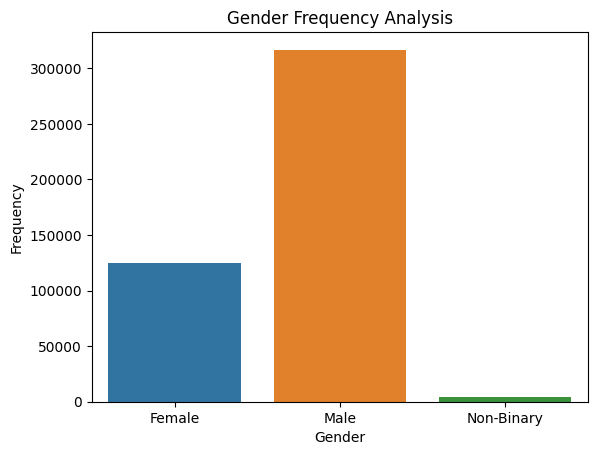

In [ ]:
# Calculate the frequency of each gender in the dataset:
gender_counts = df['gender'].value_counts()

# Plot the frequency of each gender using a bar chart:
sns.barplot(x = gender_counts.index, y = gender_counts.values)
plt.title('Gender Frequency Analysis')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()


Clustering data with K-Means

In [ ]:
'''
This code performs k-means clustering on our dataset, based on the gender attribute. 
The scatter plot that we display shows the distribution of scores and shows for each gender, with Male 
data points represented in red, Female data points in blue, and Non-Binary data points in green. 
We also show the centroids for each cluster.
'''

# Prepare Data

'''
We need to extract the data for each gender separately and create a dictionary, so 
we can map the color for each gender. We also need to select the attributes we
want to use for clustering (animeID and score) and normalize the data using 
MinMaxScaler.
'''

# Create dictionary to map color for each gender
colors = {"Male":"red", "Female":"blue", "Non-Binary":"green"}

# Select attributes for clustering and data normalization
X = df.loc[:,["animeID", "score"]]
X = (X - X.min()) / (X.max() - X.min())


Perform Clustering

In [ ]:
'''
We can now use K-Means algorithm for clustering. 
We will set the number of clusters to 3 (male, Female, and Non-Binary
as explanied before).
'''

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Plot Results (Numerical and Categorical Data)

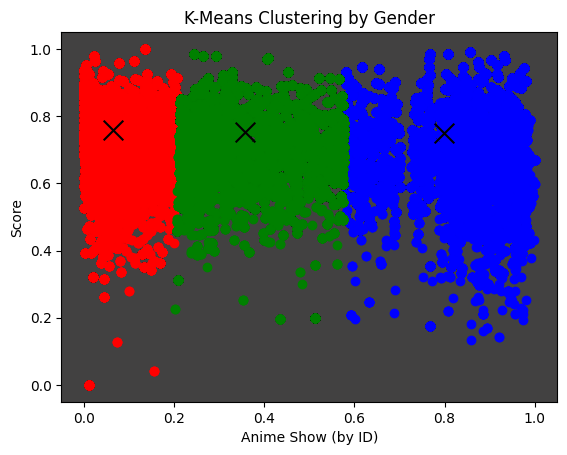

In [ ]:
'''
Finally, we can plot the results using matplotlib. We will create a scatter plot for each gender 
and assign the corresponding color.'
'''

# Create scatter plot for each gender
for i in range(len(colors)):
    plt.scatter(X.iloc[labels == i, 0], X.iloc[labels == i, 1], color=colors[list(colors.keys())[i]])

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", color="black", s=200)

# Add axis labels and title
plt.xlabel("Anime Show (by ID)")
plt.ylabel("Score")
plt.title("K-Means Clustering by Gender")

# Set background color
ax = plt.gca()
ax.set_facecolor("#424141")

# Show plot
plt.show()


Correlation Heatmap Analysis

In [11]:
'''
We want to see if there are any patterns to how the rating of a show and the users' gender when it comes to a shows score.
'''
rsg = df.groupby(['rating','score','gender'])

In [13]:
rsg.head()

,animeID,title,titleEnglish,source,episodes,status,airing,rating,score,rank,durationPerEpisode,username,userID,gender,location,birthDate
0,1165,Sakura Taisen: Ouka Kenran,0,Game,4,Finished Airing,0,PG-13 - Teens 13 or older,6.67,4903,30 min. per ep.,-OoKaMi-,211614,Male,"Lille, France",31181
1,1098,Samurai Girl Real Bout High School,Samurai Girl Real Bout High School,Light novel,13,Finished Airing,0,PG-13 - Teens 13 or older,6.02,7312,23 min. per ep.,-OoKaMi-,211614,Male,"Lille, France",31181
2,1087,Kimagure Orangeƒ??Road,0,Manga,48,Finished Airing,0,PG-13 - Teens 13 or older,7.67,1169,25 min. per ep.,-OoKaMi-,211614,Male,"Lille, France",31181
3,1198,Tsuyokiss,0,Visual novel,12,Finished Airing,0,PG-13 - Teens 13 or older,6.68,4865,24 min. per ep.,-OoKaMi-,211614,Male,"Lille, France",31181
4,1195,Zero no Tsukaima,The Familiar of Zero,Light novel,13,Finished Airing,0,PG-13 - Teens 13 or older,7.54,1543,23 min. per ep.,-OoKaMi-,211614,Male,"Lille, France",31181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444755,9324,Elf 17,0,Manga,1,Finished Airing,0,PG-13 - Teens 13 or older,5.71,7972,30 min.,zombie_pegasus,4218491,Male,North of America (Canada),35564
444756,9095,Hitomi no Naka no Shounen: Juugo Shounen Hyour...,The Story of Fifteen Boys,Novel,1,Finished Airing,0,G - All Ages,6.70,4757,1 hr. 7 min.,zombie_pegasus,4218491,Male,North of America (Canada),35564
444778,9509,Yami no Purple Eye,Purple Eyes in the Dark,Manga,1,Finished Airing,0,PG-13 - Teens 13 or older,5.00,9046,31 min.,zombie_pegasus,4218491,Male,North of America (Canada),35564
444784,9561,Shokupan Mimi,0,4-koma manga,12,Finished Airing,0,PG - Children,5.66,8095,30 sec. per ep.,zombie_pegasus,4218491,Male,North of America (Canada),35564


In [25]:
# Correlation matrix of our main dataframe:
df.corr()

<ipython-input-25-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,animeID,episodes,airing,score,rank,userID,birthDate
animeID,1.000000,-0.149300,0.174946,-0.060891,0.092478,0.293014,0.205769
episodes,-0.149300,1.000000,-0.021128,0.150016,-0.130906,-0.009834,-0.002767
airing,0.174946,-0.021128,1.000000,0.009301,0.011439,0.061583,0.032970
score,-0.060891,0.150016,0.009301,1.000000,-0.917745,0.062823,0.044360
rank,0.092478,-0.130906,0.011439,-0.917745,1.000000,-0.045362,-0.035181
userID,0.293014,-0.009834,0.061583,0.062823,-0.045362,1.000000,0.550976
birthDate,0.205769,-0.002767,0.032970,0.044360,-0.035181,0.550976,1.000000


<ipython-input-35-f9f4c39e2426>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="plasma")


<Axes: >

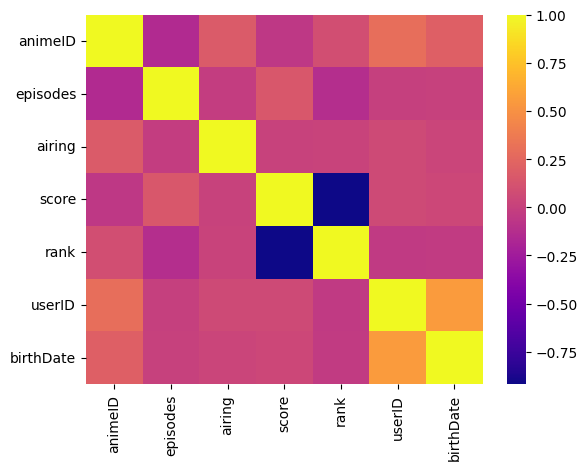

In [35]:
# Basic Correlation Heatmap based on our dataframe:

sns.heatmap(df.corr(), cmap="plasma")


Heatmap Settings

<ipython-input-40-9ff0fd5621d1>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  customMask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
<ipython-input-40-9ff0fd5621d1>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  customMask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
<ipython-input-40-9ff0fd5621d1>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of nume

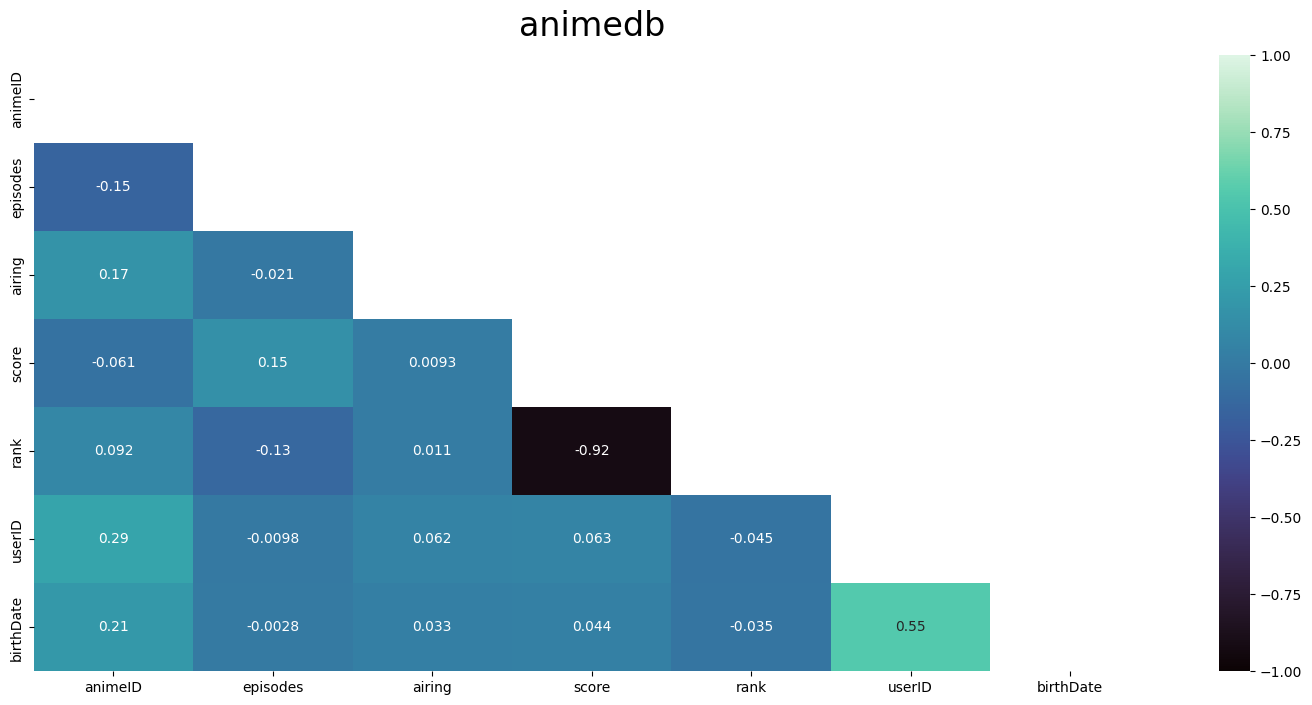

In [40]:
'''
Let's look at the overall data in a more detailed way.
By cutting it in half along the diagonal, we won't lose information.
'''

plt.figure(figsize=(18, 8))
# We define the mask to set the values in the upper triangle to 'True':
customMask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask = customMask, vmin=-1, vmax=1, annot=True, cmap='mako')
heatmap.set_title('animedb', fontdict={'fontsize':24}, pad=14);

Strength of the correlation between every independent variable in our database and the score.

In [47]:
'''
We show the correlation of all features by ‘score’, sorted in a descending order.
'''
df.corr()[['score']].sort_values(by = 'score', ascending=False)

<ipython-input-47-01f8d021c0c8>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[['score']].sort_values(by = 'score', ascending=False)


,score
score,1.000000
episodes,0.150016
userID,0.062823
birthDate,0.044360
airing,0.009301
animeID,-0.060891
rank,-0.917745


<ipython-input-53-4ea4f49175d0>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  map = sns.heatmap(df.corr()[['score']].sort_values(by='score', ascending=False),


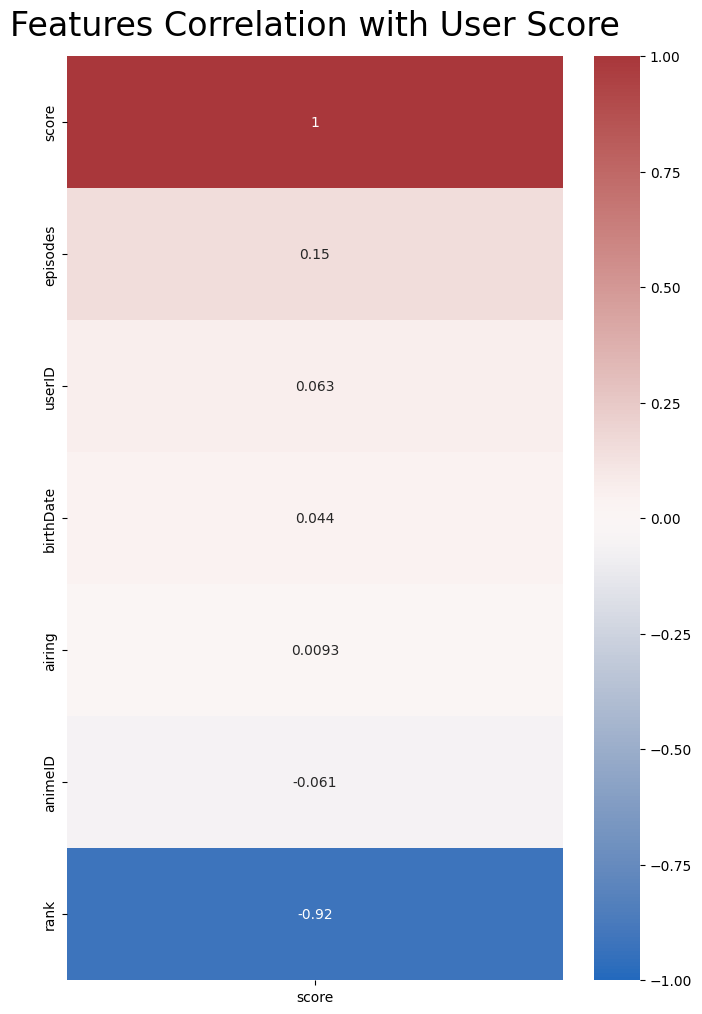

In [53]:
# Heatmap with the final results:

plt.figure(figsize=(8, 12))
map = sns.heatmap(df.corr()[['score']].sort_values(by='score', ascending=False), 
                                                 vmin=-1, vmax=1, annot=True, cmap='vlag')

map.set_title('Features Correlation with User Score', fontdict={'fontsize':24}, pad=15);

